In [40]:
# Importing all the required libraries
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing 

In [30]:
#read dataframe
missing_val = ['n/a' , '-' , '?']
df = pd.read_csv('adult.csv', na_values = missing_val)

# Adult Dataset
## This dataset cointains various details about adults such as :-
### Their age, race, gender, now much work they do, from which country do they belong, personal relationship, how much they gain ,etc.
### With this dataset we can perform a Exploratory Data Analysis.

In [31]:
a,b = df.shape
print("Total number of rows are : " ,a)
print("Total number of columns are : " ,b)

Total number of rows are :  48842
Total number of columns are :  15


In [8]:
print(df.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')


### Observations:-
#### 1. There are about 48842 instances.
#### 2. Number of Attributes/Fearures/Columns : 6 Continuous, 8 Cominal Attributes. 

In [14]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


### Observations:-
#### Here we can see the first five rows of our Adult dataset.

In [15]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


### Observations:- 
#### 1. Here we see the descriptive statistical analysis on numerical columns of the dataframe.
#### 2. There is a column named 'fnlwgt' which makes no sense and we must delete this attribute.

In [32]:
del df['fnlwgt']

In [21]:
df.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


### Observations :- 
#### We have successfully deleted/removed the useless attribute from our dataset which is clearly visible in the table above.

In [33]:
re = df.isnull().sum().sum()
print(re)

6465


In [34]:
df = df.dropna(how = 'any')

In [35]:
new_rows , c = df.shape
print("Total number of rows now : " ,new_rows)
print("Total number of column now : " ,c)
df.head() 

Total number of rows now :  45222
Total number of column now :  14


,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [36]:
# a variable has number of rows before deletion  missing values
# new_rows has number of rows afetr deletion of missing values
re_rows = a - new_rows
per = (re_rows/a) * 100
print("Percentage of rows removed are : ",per)

Percentage of rows removed are :  7.411653904426519


### Observations :- 
#### 1. There are in total 6465 missing values or null values in our dataset.
#### 2. We have handled all the missing values by removing all the rows who had at least one missing value in it.
#### 3. As you can see before handling missing values there were 48842 rows, now we have 45222 rows.
#### 4.Total percentage of rows cointaining missing values are : 7.41%

In [32]:
pd.crosstab(df['gender'], df['income'], normalize = 'index')

income,<=50K,>50K
gender,,
Female,0.886424,0.113576
Male,0.687523,0.312477


### Observations :- 
#### 1. There are 11% females who earns more than 50,000 , whereas 88% females earns 50,000 or less.
#### 2. There are 31% males who earns more than 50,000 , whereas 68% males earns 50,000 or less.

In [15]:
pd.crosstab(df['age'], df['marital-status'], normalize = 'index')

marital-status,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
age,,,,,,,
17,0.000000,0.000000,0.004057,0.002028,0.993915,0.000000,0.000000
18,0.001439,0.000000,0.015827,0.002878,0.979856,0.000000,0.000000
19,0.009259,0.003472,0.019676,0.005787,0.954861,0.006944,0.000000
20,0.008734,0.000000,0.048035,0.003275,0.932314,0.007642,0.000000
21,0.010695,0.000000,0.073797,0.008556,0.897326,0.008556,0.001070
...,...,...,...,...,...,...,...
86,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
87,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
88,0.200000,0.000000,0.600000,0.000000,0.000000,0.000000,0.200000


### Observations :- 
#### As the age increases :
####  1. Number of divorced people increases.
####  2. People start getting married ad number of entries in never-married decreases.

# Univarient Analysis

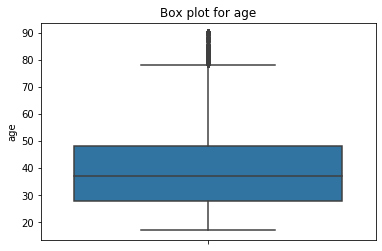

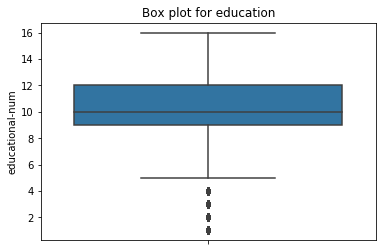

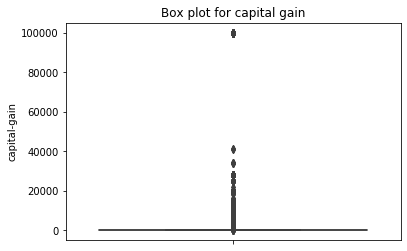

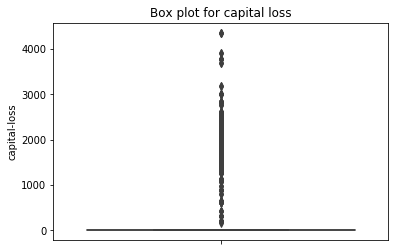

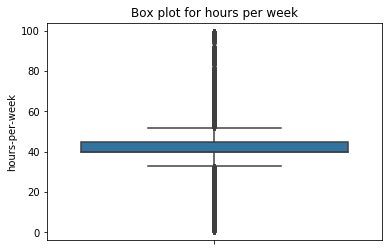

In [8]:
sbn.boxplot(y='age',data = df)
plt.title("Box plot for age")
plt.show()

sbn.boxplot(y='educational-num',data = df)
plt.title("Box plot for education")
plt.show()

sbn.boxplot(y='capital-gain',data = df)
plt.title("Box plot for capital gain")
plt.show()

sbn.boxplot(y='capital-loss',data = df)
plt.title("Box plot for capital loss")
plt.show()

sbn.boxplot(y='hours-per-week',data = df)
plt.title("Box plot for hours per week")
plt.show()



## Observations :-
### 1. For Age : 
#####   => Median is : 36.
#####   => Average entries lies between 28 to 48.
#####   => Lower age is : 18.
#####   => Highest age is : 78.
#####   => Outliers lies between 80 to 90 and above.
### 2. For Education Number : 
#####   => Median is : 10.
#####   => Average entries lies between 9 to 12.
#####   => Lower num is : 5.
#####   => Highest num is : 16.
#####   => Outliers lies between 1 to 4.
### 3. For Capital Gain and Loss : 
#####   => Most of the entries are 0.
### 4. For Hours per week : 
#####   => Median is : 41.
#####   => Average entries lies between 40 to 42.
#####   => Lower work hours is : 34
#####   => Highest work hours is : 50.
#####   => Outliers lies between 1 to 34 and 50 to 100.

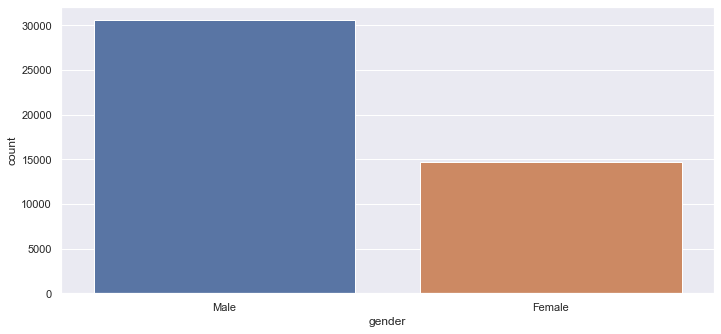

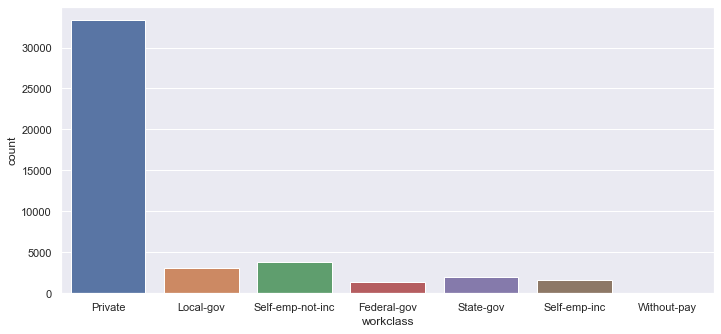

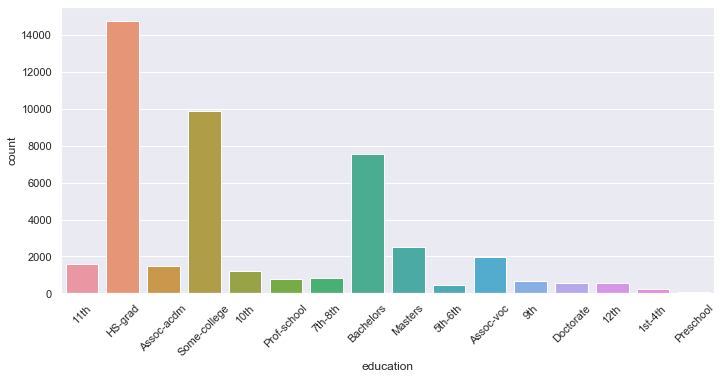

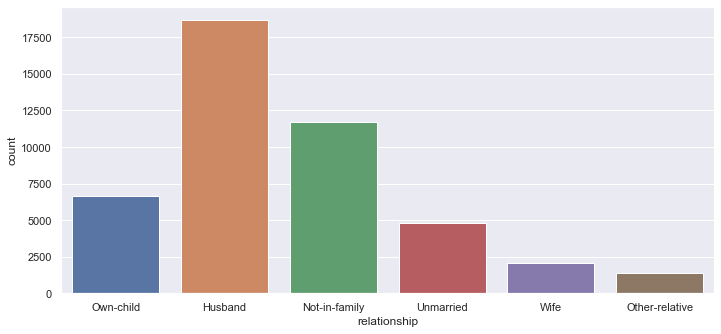

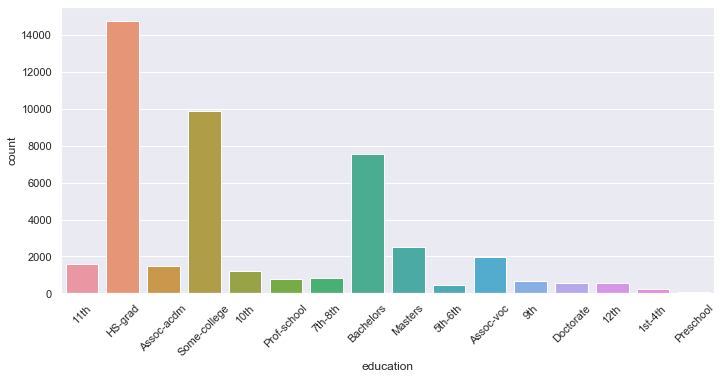

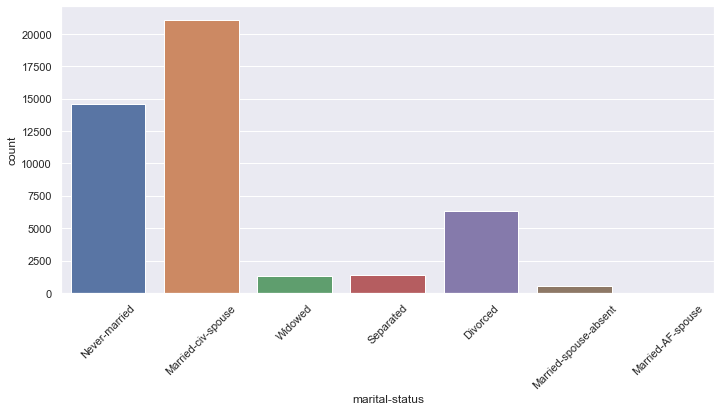

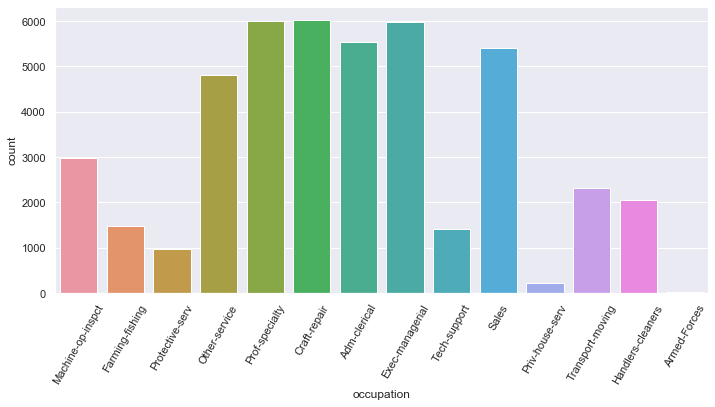

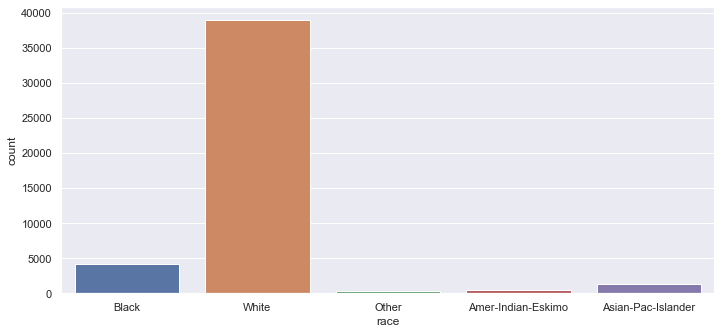

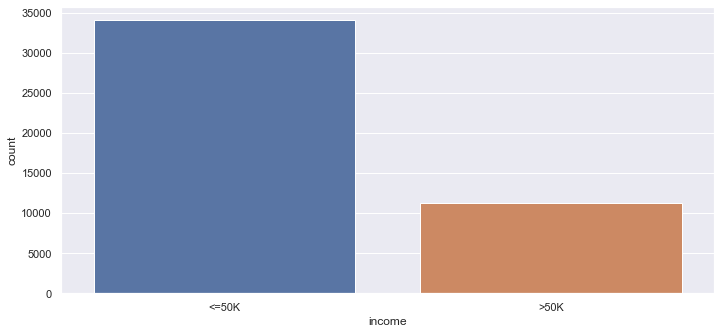

In [12]:
sns.set(rc = {'figure.figsize': (11.7,5.27)})
sns.countplot(x = 'gender' ,data = df)
plt.show()

sns.countplot(x = 'workclass' ,data = df)
plt.show()

sns.countplot(x = 'relationship' ,data = df)
plt.show()

sns.countplot(x = 'education' ,data = df)
plt.xticks(rotation = 45)
plt.show()

sns.countplot(x = 'marital-status' ,data = df)
plt.xticks(rotation = 45)
plt.show()

sns.countplot(x = 'occupation' ,data = df)
plt.xticks(rotation = 60)
plt.show()

sns.countplot(x = 'race' ,data = df)
plt.show()

sns.countplot(x = 'income' ,data = df)
plt.show()

## Observations :-
### 1. For gender : 
#####   => Male entries are more than those of females
#####   => Males : More than 32,000 entries
#####   => Females : About 14,000 entries
### 2. For Workclass : 
#####   => Most of the entries are of Private class (More than 37,000) .
#####   =>There are very less amount of people without any payment.
### 3. For Education : 
#####   => Most of the entries are of from HS-Grad (About 15,000) .
#####   => There are very less amount of entries for Pre-School .
### 4. For Relationship : 
#####   => Most of the entries are of Husband (About 19,000) .
#####   => There are comparitively less entries for Others and Wife (Less than 2500) .
#####   => The entries decreases significantaly from Husband to Others.
### 5. For Marital Status : 
#####   => Most of the entries are of from Married-civ-Spouse (About 22,500) .
#####   => There are very less amount of entries for Marries-AF-Spouse .
### 6. For Occupation : 
#####   => Most of the entries are from Prof-Specially, Craft Repair, Exec Managerial (About 6000) .
#####   => There are very less amount of entries for Priv-House-Serv.
### 7. For Race : 
#####   => Most of the entries are of White people (About 38,000) .
#####   => There are very less amount of entries for Others and Armer-Indian-Eskimo (Less than 1000).
### 8. For Income : 
#####   => There are about 34,000 entries that earn  less than or equals to 50,000 per mounth.
#####   => There are about 11,000 entries that earn more than 50,000 per mounth .

Text(0, 0.5, 'No. of people')

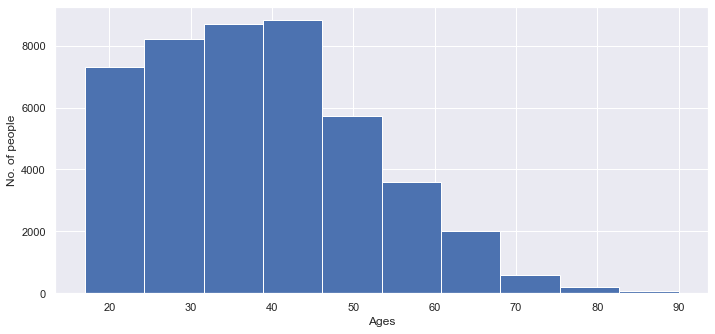

In [21]:
sns.set(rc = {'figure.figsize': (11.7,5.27)})
hist_plot =df.age.hist(bins = 10)
hist_plot.set_xlabel("Ages")
hist_plot.set_ylabel("No. of people")

### Observations :- 
#### 1. In this dataset the lowest number of people are of the age between 83 to 90 ,i.e, less than 100.
#### 2. In this dataset the highest number of people are of the age between 40 to 45 ,i.e, about 9500.
#### 3. Amount of people increases from age 17 to 45 and then decreases from 45 to 90.

Text(0, 0.5, 'No. of people')

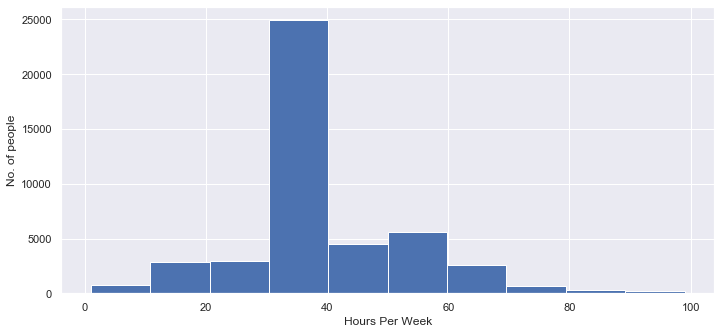

In [23]:
hist_plot =df['hours-per-week'].hist(bins = 10)
hist_plot.set_xlabel("Hours Per Week")
hist_plot.set_ylabel("No. of people")

### Observations :-
#### 1. About 25,000 people works for 30 - 40 hours per week.
#### 2. About 100 people work for 85 - 99 hours per week ,i.e, that is highest in the dataset.
#### 3. About 250-300 people work for 1 -10 hours per week ,i.e, that is highest in the dataset.

Text(0, 0.5, 'No. of people')

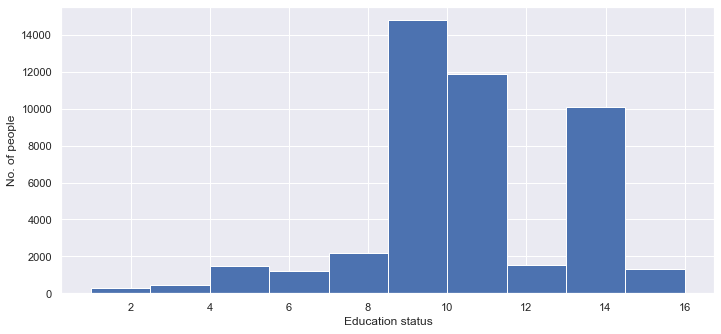

In [24]:
hist_plot =df['educational-num'].hist(bins = 10)
hist_plot.set_xlabel("Education status")
hist_plot.set_ylabel("No. of people")

### Observations :-
#### 1. More than 14,000  people have a education number between 9 and 10.
#### 2. About 16,000 people have the highest  education number in this dataset ,i.e, 16.
#### 3. Less than 1000 people have lowest education number ,i.e, 2. 

# Bivarient Analysis 

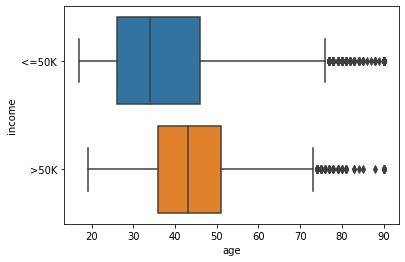

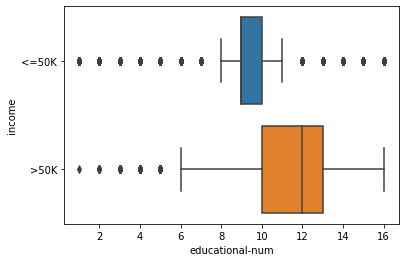

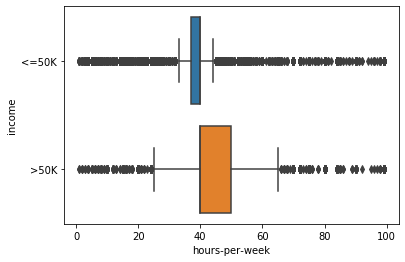

In [17]:
sns.boxplot(x="age", y="income", data=df)
plt.show()

sns.boxplot(x="educational-num", y="income", data=df)
plt.show()

sns.boxplot(x="hours-per-week", y="income", data=df)
plt.show()

## Observations :-
### 1. Age vs income : 
#####   => The mean age for income (<= 50K) is 36 and for income (>50K) is 44.
#####   => Lowest for income (<= 50K) is 2 and highest is 78.
#####   => Lowest for income (>50K) is 20 and highest is 74.
#####   => Most of the entries for income (<= 50K) lies between 27 - 48 and for income (> 50K) is 38-51.
#####   => Outliers for income (<= 50K) lies between 78 - 90 and for income ( > 50k) is 74 - 90.
### 2. Educational num vs income : 
#####   => The mean num for income (<= 50K) is about 9.5 and for income (>50K) is 12.
#####   => Lowest for income (<= 50K) is 8 and highest is 11.
#####   => Lowest for income (>50K) is 6 and highest is 13.
#####   => Most of the entries for income (<= 50K) lies between 9and 10, and for income (> 50K) is 10 -13.
#####   => Outliers for income (<= 50K) lies between 1 - 7 and 12 - 16,  and for income ( > 50k) is 1 - 5.
### 3. Hours per week vs income : 
#####   => The mean age for income (<= 50K) is 39 and for income (>50K) is 48.
#####   => Lowest for income (<= 50K) is 35 and highest is 44.
#####   => Lowest for income (>50K) is 25 and highest is 65.
#####   => Most of the entries for income (<= 50K) lies between 38 - 41 and for income (> 50K) is 40 - 51.
#####   => Outliers for income (<= 50K) lies between 0 - 34 and 44 - 100 ,  and for income ( > 50k) is 1 - 24 and 66 - 100.

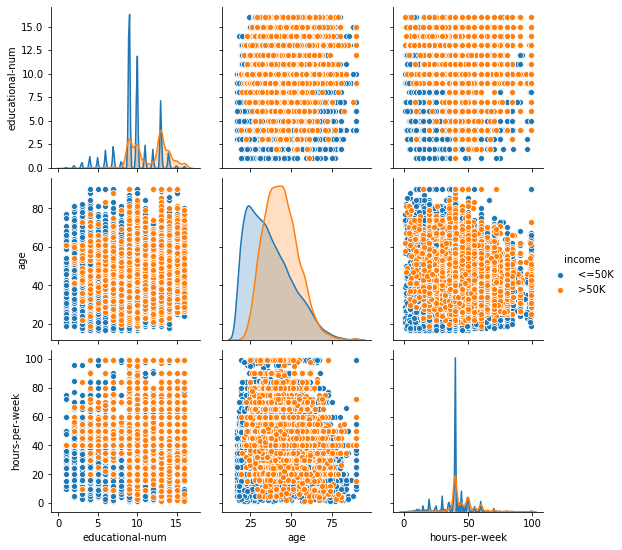

In [15]:
sns.pairplot(df, hue = 'income', vars ={'age' , 'hours-per-week', 'educational-num'})
plt.show()

### Observations :
- Age and hours are slightly predictable
- Linear relationship is unpredictable.

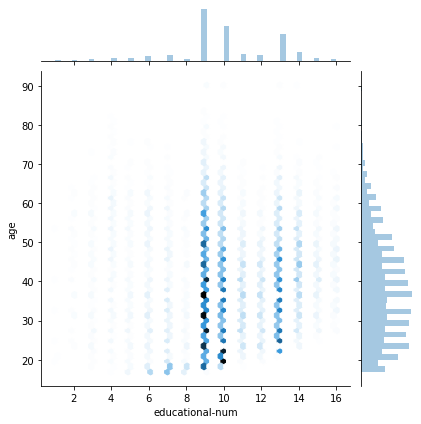

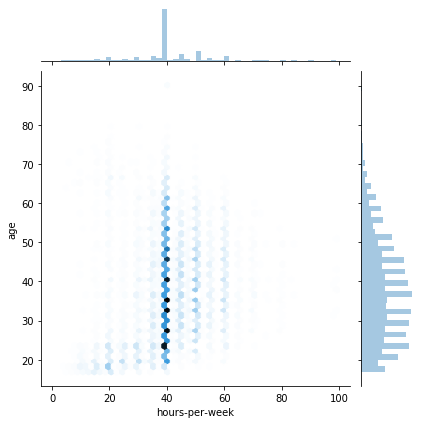

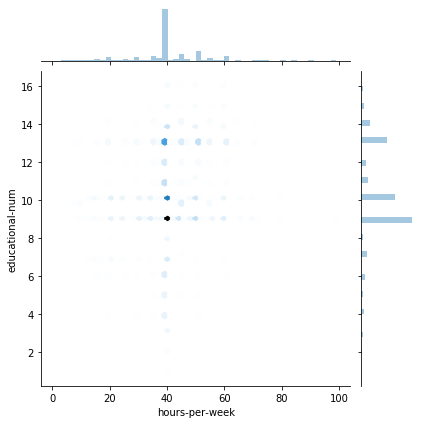

In [36]:
sbn.jointplot(x = 'educational-num' , y = 'age' ,data = df,kind = 'hex')
plt.show()

sbn.jointplot(x = 'hours-per-week' , y = 'age' ,data = df,kind = 'hex')
plt.show()

sbn.jointplot(x = 'hours-per-week' , y = 'educational-num' ,data = df,kind = 'hex')
plt.show()

### Observations :-
#### 1. For age vs educational number -
#####     =>Most results are from educational number 9 (age 17 to 65) as its hex line is much more darker than any other line.
#####     =>Most comman region is from educational num 9 to 13. There is a downfall at 11 and 12 as color gets light.
#### 2. For age vs hours per week -
#####     =>Most results are from people working 40 hours per week (age 17 to 65)as its hex line is much more darker than any other line.
#####     =>Most comman region is from 40 to 50 hours per week. Rest all the hex lines are very light.
#### 3. For hours per week vs educational number -
#####     =>Most results are from people working 40 houes per week (educational num 9 ,10 and 13) as its hex line is much more darker than any other line.
#####     =>Most comman region is from 40 to 65 hours per week (educational num 9 to 13). Rest all the hex lines are very light.


# Conclusion :
- We have got more male entries as compared to females.
- We had about 7.41 % missing values that we identified and successfully treated.
- We have a dataset that have entries from age 18 to 99!
- People's work hours lies between 1 hour to even 100 hours per week.
- Mostaly people work for 40 - 42 hours per week.
- Most of the people work for Private Class and very less are unemployed.
- Entries for husbands are more than wife as relationship.
- Most of the entries are of white people.
- About 14,000 people are having educational number of 9th and 10th.
- Less than 1000 people are having 2 as their educationl numebr
- Low earners have age about 27 - 48 and comapritively high earners have age for about 38 - 51.
- Low earners have educational num for about 8 - 1 and comapritively high earners have about for 6 - 13.
- Low earners works for about 35 - 44 hours per week and comapritively high earners work for about25 - 65 hours per week.
- Most of the entries have educational number of 9th.
- For the age group of 17-65, people work for about 40 hours per week.
- People working for about 40 hours per week have educational number as : 9 ,10 and 13.

# Column Normalization

In [37]:
df.describe()

,age,educational-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,1101.430344,88.595418,40.938017
std,13.217870,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


### This is statistical analysis for numerical columns before normalizations.

In [38]:
x = df['age'].values.reshape(-1,1)
min_max_scaler = preprocessing.MinMaxScaler()
x_age = min_max_scaler.fit_transform(x)
df['age'] = x_age

x = df['educational-num'].values.reshape(-1,1)
min_max_scaler = preprocessing.MinMaxScaler()
x_education = min_max_scaler.fit_transform(x)
df['educational-num'] = x_education

x = df['capital-gain'].values.reshape(-1,1)
min_max_scaler = preprocessing.MinMaxScaler()
x_gain = min_max_scaler.fit_transform(x)
df['capital-gain'] = x_gain

x = df['capital-loss'].values.reshape(-1,1)
min_max_scaler = preprocessing.MinMaxScaler()
x_loss = min_max_scaler.fit_transform(x)
df['capital-loss'] = x_loss

x = df['hours-per-week'].values.reshape(-1,1)
min_max_scaler = preprocessing.MinMaxScaler()
x_hours = min_max_scaler.fit_transform(x)
df['hours-per-week'] = x_hours


In [39]:
df.describe()

,age,educational-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,0.295177,0.607897,0.011014,0.020339,0.407531
std,0.181067,0.170192,0.075065,0.092965,0.122526
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.150685,0.533333,0.000000,0.000000,0.397959
50%,0.273973,0.600000,0.000000,0.000000,0.397959
75%,0.410959,0.800000,0.000000,0.000000,0.448980
max,1.000000,1.000000,1.000000,1.000000,1.000000


### Observation : We can clearly see that all the numerical values now lies between 0 and 1

In [25]:
df.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.109589,Private,11th,0.400000,Never-married,Machine-op-inspct,Own-child,Black,Male,0.000000,0.0,0.397959,United-States,<=50K
1,0.287671,Private,HS-grad,0.533333,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.000000,0.0,0.500000,United-States,<=50K
2,0.150685,Local-gov,Assoc-acdm,0.733333,Married-civ-spouse,Protective-serv,Husband,White,Male,0.000000,0.0,0.397959,United-States,>50K
3,0.369863,Private,Some-college,0.600000,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,0.076881,0.0,0.397959,United-States,>50K
5,0.232877,Private,10th,0.333333,Never-married,Other-service,Not-in-family,White,Male,0.000000,0.0,0.295918,United-States,<=50K


### We have about 9 columns in our data set that are categoric. Here we will perform dummy variable .

In [28]:
pd.get_dummies(df , columns = ['workclass' , 'education' , 'marital-status' ,'relationship' ,'occupation', 'race' ,'gender','native-country' , 'income'] ,drop_first =True)

,age,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
0,0.109589,0.400000,0.000000,0.0,0.397959,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0.287671,0.533333,0.000000,0.0,0.500000,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0.150685,0.733333,0.000000,0.0,0.397959,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0.369863,0.600000,0.076881,0.0,0.397959,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
5,0.232877,0.333333,0.000000,0.0,0.295918,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0.136986,0.733333,0.000000,0.0,0.377551,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
48838,0.315068,0.533333,0.000000,0.0,0.397959,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
48839,0.561644,0.533333,0.000000,0.0,0.397959,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
48840,0.068493,0.533333,0.000000,0.0,0.193878,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


### Observation : We can clearly see all the categorical columns are now have been replaced to their respective dummy variables.